# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na √°rea de Marketing em entender as necessidades e demandas dos clientes de maneira f√°cil e r√°pida nas redes sociais. A solu√ß√£o proposta para esse problema foi o desenvolvimento de uma Intelig√™ncia Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solu√ß√£o √© rastrear os dados em tempo real, analisar e interpretar as mensagens e coment√°rios enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto est√° utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informa√ß√µes dispostas nesse dataset, realizaremos insights a cerca dos coment√°rios feitos nos posts do Instagram do pr√≥prio banco. Vale lembrar que os dados est√£o anonimizados e resguardados para manter a privacidade e √©tica com os usu√°rios e com o banco.

# 1. Instala√ß√£o / Setup

Para o in√≠cio do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma c√©lula de conex√£o com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisar√° do dataset baixado.

In [17]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Aqui n√≥s fazemos as importa√ß√µes para tratamento dos dados e modelagem do Bag of Words, para logo depois aplicar o algoritmo de Naive Bayes.

In [18]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

from sklearn.feature_extraction.text import CountVectorizer
import ast
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

import nltk
import spacy
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier
from pycaret.classification import *


# 2. Entendimento e Tratamento dos Dados

Rodando o dataset, para analisar seu conte√∫do:

In [27]:
df = pd.read_csv('/content/drive/MyDrive/nova_base_tratada2')
df

autor  sentimento  \
0                winthegame_of           1   
1                   marta_bego           1   
2                   lmviapiana           2   
3                  ricktolledo           2   
4           donadabolsaoficial           0   
...                        ...         ...   
8035  perspectiveinvestimentos           2   
8036            eduardocolares           2   
8037                 danielucm           2   
8038          amgcapitalinvest           1   
8039                 bfmarilia           0   

                                          texto_tratado  
0     ['alvarez', 'marsal', 'estar', 'conosco', 'spo...  
1     ['btgpactual', 'with', 'make_repost', 'entenda...  
2                           ['minuto', 'touro', 'ouro']  
3         ['querer', 'saber', 'banking', 'administrar']  
4     ['in√≠cio', 'guerra', 'r√∫ssia', 'ucr√¢nia', 'vel...  
...                                                 ...  
8035                        ['excelente', 'explica√ß√£o']  
8036            ['atendar', 'telefone', 'amor', 'deus']  
8037  ['grande', 'fiis', 'mercado', 'n√£o', 'selecion...  
8038  ['erro', 'financeiro', 'eliminar', 'parar', 'o...  
8039  ['morning', 'call', 'n√£o', 'aparecer', 'spotif...  

[8040 rows x 3 columns]

In [28]:
df.columns

Index(['autor', 'sentimento', 'texto_tratado'], dtype='object')

In [29]:
df['texto_tratado'] = df['texto_tratado'].str.replace("'", "")
df['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, make_repost, entendar, impa...
2                                   [minuto, touro, ouro]
3                   [querer, saber, banking, administrar]
4       [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...
                              ...                        
8035                              [excelente, explica√ß√£o]
8036                      [atendar, telefone, amor, deus]
8037    [grande, fiis, mercado, n√£o, selecionar, princ...
8038    [erro, financeiro, eliminar, parar, ostentar, ...
8039    [morning, call, n√£o, aparecer, spotify, atuali...
Name: texto_tratado, Length: 8040, dtype: object

In [30]:
df

autor  sentimento  \
0                winthegame_of           1   
1                   marta_bego           1   
2                   lmviapiana           2   
3                  ricktolledo           2   
4           donadabolsaoficial           0   
...                        ...         ...   
8035  perspectiveinvestimentos           2   
8036            eduardocolares           2   
8037                 danielucm           2   
8038          amgcapitalinvest           1   
8039                 bfmarilia           0   

                                          texto_tratado  
0     [alvarez, marsal, estar, conosco, sportainmet,...  
1     [btgpactual, with, make_repost, entendar, impa...  
2                                 [minuto, touro, ouro]  
3                 [querer, saber, banking, administrar]  
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...  
...                                                 ...  
8035                            [excelente, explica√ß√£o]  
8036                    [atendar, telefone, amor, deus]  
8037  [grande, fiis, mercado, n√£o, selecionar, princ...  
8038  [erro, financeiro, eliminar, parar, ostentar, ...  
8039  [morning, call, n√£o, aparecer, spotify, atuali...  

[8040 rows x 3 columns]

## 2.1 Visualiza√ß√£o dos dados

### Autores que mais comentam

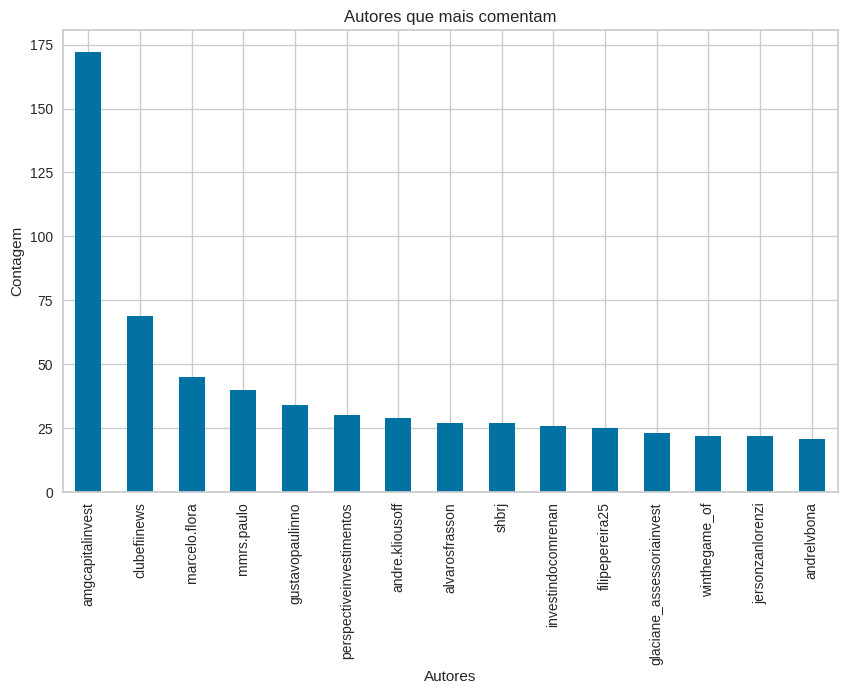

In [31]:
# Contagem de palavras
autor_counts = df['autor'].explode().value_counts()

# Plotagem do gr√°fico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(15).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

# 3. Bag of Words (BoW)

O modelo Bag of Words (BoW) √© uma t√©cnica utilizada em processamento de linguagem natural para representar um texto como um conjunto de palavras desordenadas, ignorando a ordem e a estrutura gramatical das frases. 

Nesse modelo, cada palavra √∫nica do texto √© transformada em uma "feature" (caracter√≠stica), e a frequ√™ncia de cada palavra no texto √© usada como um valor num√©rico para a feature correspondente.

Por exemplo, a frase "O gato preto pulou o muro" seria representada como um conjunto de palavras desordenadas: `'o', 'gato', 'preto', 'pulou', 'o', 'muro'`. A frequ√™ncia de cada palavra seria contada, e o resultado seria um vetor num√©rico que representa a frequ√™ncia de cada palavra na frase.


## 3.1 Teste isolado

In [32]:
# Multiple documents
text = ["Estamos fazendo um projeto pro BTG!", "Somos alunos de Sistemas de Informa√ß√£o do Inteli", "O Renato √© o nosso orientador", "O Hayashi √© o nosso professor de programa√ß√£o"] 

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(sorted(vectorizer.vocabulary_))

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

['alunos', 'btg', 'de', 'do', 'estamos', 'fazendo', 'hayashi', 'informa√ß√£o', 'inteli', 'nosso', 'orientador', 'pro', 'professor', 'programa√ß√£o', 'projeto', 'renato', 'sistemas', 'somos', 'um']
(4, 19)
[[0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 2 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]]


**AVISO**:
O modelo Bag of Words √© uma t√©cnica simples e eficiente para representar textos em formato vetorial, o que permite utiliz√°-los em algoritmos de aprendizado de m√°quina. 

No entanto, essa abordagem ignora informa√ß√µes importantes sobre a estrutura e o significado das frases, como a ordem das palavras e as rela√ß√µes sint√°ticas entre elas. Por isso, √© comum utilizar t√©cnicas mais avan√ßadas, como a modelagem de t√≥picos (topic modeling) e as redes neurais, para lidar com textos mais complexos.

Por√©m, para vieses acad√™micos, estamos implementando e aprendendo como √© o funcionamento desse processo.

## 3.2 Defini√ß√£o da Fun√ß√£o


In [33]:
df

autor  sentimento  \
0                winthegame_of           1   
1                   marta_bego           1   
2                   lmviapiana           2   
3                  ricktolledo           2   
4           donadabolsaoficial           0   
...                        ...         ...   
8035  perspectiveinvestimentos           2   
8036            eduardocolares           2   
8037                 danielucm           2   
8038          amgcapitalinvest           1   
8039                 bfmarilia           0   

                                          texto_tratado  
0     [alvarez, marsal, estar, conosco, sportainmet,...  
1     [btgpactual, with, make_repost, entendar, impa...  
2                                 [minuto, touro, ouro]  
3                 [querer, saber, banking, administrar]  
4     [in√≠cio, guerra, r√∫ssia, ucr√¢nia, velho, apare...  
...                                                 ...  
8035                            [excelente, explica√ß√£o]  
8036                    [atendar, telefone, amor, deus]  
8037  [grande, fiis, mercado, n√£o, selecionar, princ...  
8038  [erro, financeiro, eliminar, parar, ostentar, ...  
8039  [morning, call, n√£o, aparecer, spotify, atuali...  

[8040 rows x 3 columns]

In [34]:
def bow(frases):
    # Inicializa o CountVectorizer
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma √∫nica string
    frases_concatenadas = [''.join(tokens) for tokens in frases]

    # Cria o modelo Bag of Words
    bow_model = vectorizer.fit_transform(frases_concatenadas)

    # Dicion√°rio de palavras
    dicionario = vectorizer.vocabulary_

    return bow_model, dicionario

# Aplicar a fun√ß√£o de Bag of Words
bow_model, dicionario = bow(df['texto_tratado'].tolist())

## 3.3 Testes das fun√ß√µes


In [35]:
bow_model, dicionario

(<8040x18459 sparse matrix of type '<class 'numpy.int64'>'
 	with 145170 stored elements in Compressed Sparse Row format>,
 {'alvarez': 735,
  'marsal': 10926,
  'estar': 6432,
  'conosco': 3932,
  'sportainmet': 16172,
  'labsr': 9961,
  'evento': 6593,
  'sportainment': 16171,
  'am√©ricar': 863,
  'latino': 10040,
  'parceria': 12709,
  'hubstage': 8552,
  'bichar': 2086,
  'motta': 11599,
  'advogado': 368,
  'win': 18071,
  'the': 16750,
  'game': 7726,
  'participe': 12747,
  'online': 12367,
  'gratuito': 8108,
  'mar√ßo': 10946,
  'inscreva': 9110,
  'link': 10302,
  'bio': 2110,
  'btgpactual': 2490,
  'with': 18086,
  'make_repost': 10701,
  'entendar': 6104,
  'impacto': 8765,
  'conflito': 3884,
  'r√∫ssia': 15320,
  'ucr√¢nio': 17275,
  'cen√°rio': 3097,
  'global': 7949,
  'live': 10334,
  'in√©dito': 9383,
  'amanh√£': 767,
  'anatole': 894,
  'kaletsky': 9837,
  's√≥cio': 16470,
  'fundador': 7607,
  'economista': 5686,
  'chefe': 3221,
  'gavekal': 7786,
  'research': 

- A cada vetor, √© uma palavra diferente. Veja os exemplos abaixo:

In [36]:
peso_procurado = 19384
palavra_procurada = None

for palavra, peso in dicionario.items():
    if peso == peso_procurado:
        palavra_procurada = palavra
        break

print(palavra_procurada)

None


In [37]:
peso_procurado = 19380
palavra_procurada = None

for palavra, peso in dicionario.items():
    if peso == peso_procurado:
        palavra_procurada = palavra
        break

print(palavra_procurada)

None


In [38]:
# Imprime o vocabul√°rio de palavras constru√≠do a partir do dataset
print("Dicion√°rio de palavras:")
print(dicionario, "\n")

# Imprime a matriz Bag of Words
print("Representa√ß√£o Bag of Words:")
print(bow_model.toarray())

Dicion√°rio de palavras:
{'alvarez': 735, 'marsal': 10926, 'estar': 6432, 'conosco': 3932, 'sportainmet': 16172, 'labsr': 9961, 'evento': 6593, 'sportainment': 16171, 'am√©ricar': 863, 'latino': 10040, 'parceria': 12709, 'hubstage': 8552, 'bichar': 2086, 'motta': 11599, 'advogado': 368, 'win': 18071, 'the': 16750, 'game': 7726, 'participe': 12747, 'online': 12367, 'gratuito': 8108, 'mar√ßo': 10946, 'inscreva': 9110, 'link': 10302, 'bio': 2110, 'btgpactual': 2490, 'with': 18086, 'make_repost': 10701, 'entendar': 6104, 'impacto': 8765, 'conflito': 3884, 'r√∫ssia': 15320, 'ucr√¢nio': 17275, 'cen√°rio': 3097, 'global': 7949, 'live': 10334, 'in√©dito': 9383, 'amanh√£': 767, 'anatole': 894, 'kaletsky': 9837, 's√≥cio': 16470, 'fundador': 7607, 'economista': 5686, 'chefe': 3221, 'gavekal': 7786, 'research': 14845, 'jo√£o': 9729, 'scandiuzzi': 15526, 'estrategista': 6487, 'wealth': 18011, 'management': 10727, 'modera√ß√£o': 11462, 'daniel': 4624, 'cunha': 4499, 'vivo': 17878, 'canal': 2720, 'yo

In [39]:
# Converte a matriz 
bow_array = bow_model.toarray()

# Cria um novo DataFrame a partir do Bag of words constru√≠do
bow = pd.DataFrame(bow_array)

# Define o √≠ndice do DataFrame 'bow' para ser o mesmo que o DataFrame 'sentimento', j√° que a coluna sentimento est√° de acordo com o √≠ndice de cada palavra
bow.index = df.index
bow['sentimento'] = df['sentimento']

# Exibir o DataFrame resultante
bow

0  1  2  3  4  5  6  7  8  9  ...  18450  18451  18452  18453  18454  \
0     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
1     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
2     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
3     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
...  .. .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...    ...   
8035  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
8036  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
8037  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
8038  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
8039  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

      18455  18456  18457  18458  sentimento  
0         0      0      0      0           1  
1         0      0      0      0           1  
2         0      0      0      0           2  
3         0      0      0      0           2  
4         0      0      0      0           0  
...     ...    ...    ...    ...         ...  
8035      0      0      0      0           2  
8036      0      0      0      0           2  
8037      0      0      0      0           2  
8038      0      0      0      0           1  
8039      0      0      0      0           0  

[8040 rows x 18460 columns]

### No dataframe acima, pode-se ver que foram selecionadas 19.393 palavras para servir como an√°lise. 

- Nota: Tenha em mente que quanto mais palavras (de qualidade) se tenha, melhor ser√° a an√°lise e desenvolvimento do resultado IA.

- An√°lise de frequ√™ncia das palavras a partir de uma fun√ß√£o.



In [40]:
def bow_dataframe(input):
    tokenizer = Tokenizer() # usando o tokenizer da biblioteca do keras
    tokenizer.fit_on_texts(input) # fitando o tokenizer com o que ser√° passado como par√¢metro
    wordCount = tokenizer.word_counts # pegando a contagem de palavras do tokenizer
    dfCountBoW = pd.DataFrame(list(wordCount.items())) # transformando em dataframe para melhor visualiza√ß√£o
    dfCountBoW.rename(columns={0: "Palavra", 1:"Frequ√™ncia"}, inplace=True) # renomeando as colunas 
    final_df = dfCountBoW.sort_values(by=['Frequ√™ncia'], ascending=False) # ordenando o dataframe
    return final_df

- Aqui iremos plotar um dataframe para mostrar a frequ√™ncia de palavras.
- Temos os vetores como √≠ndice, a palavra respectiva e a frequ√™ncia dela na matriz.

In [41]:
output = bow_dataframe(df['texto_tratado'])
output.head(20)

Palavra  Frequ√™ncia
25      btgpactual        2802
60             n√£o        2339
96           banco        1314
135   investimento        1139
248        mercado         904
215            bom         850
249     financeiro         831
6           evento         797
149          fundo         709
242         brasil         700
245        cliente         687
340             ir         571
1308       empresa         526
772         contar         523
410            pra         522
143              r         502
84           valor         494
327           time         490
879           taxa         424
294          ficar         416

# 4. Plotagem de Gr√°ficos

- Agora irei plotar uma nuvem de palavras para melhor visualiza√ß√£o das palavras mais frequentes de acordo com a matriz

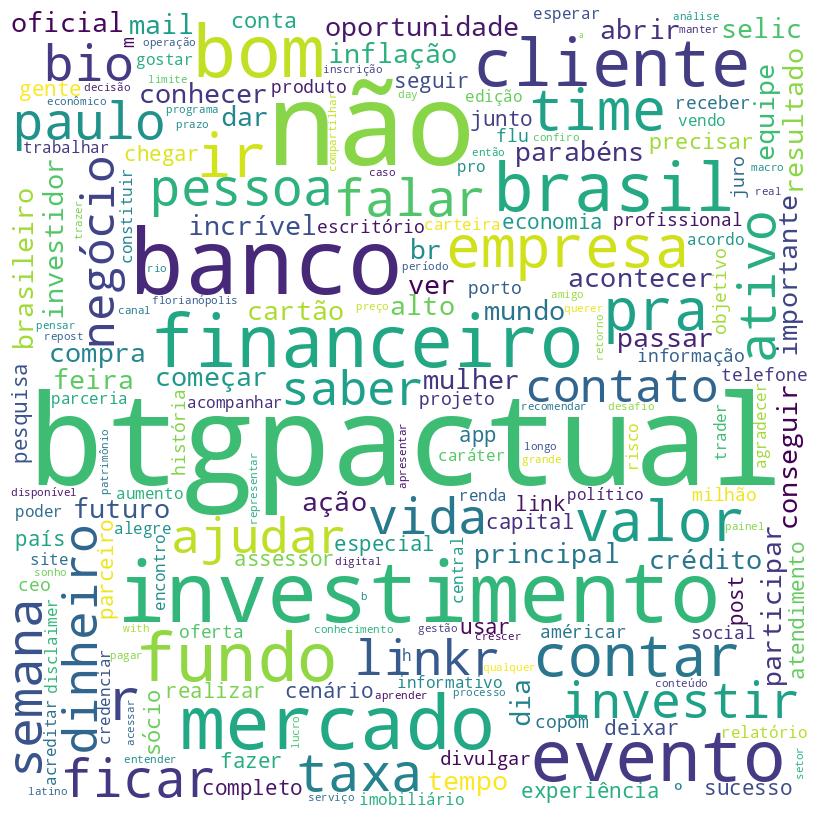

In [42]:
# Criar uma lista das palavras e suas frequ√™ncias a partir do DataFrame de sa√≠da
palavras = output['Palavra'].tolist()
frequencias = output['Frequ√™ncia'].tolist()

# Criar um dicion√°rio de palavras e frequ√™ncias, aqui as palavras s√£o as chaves e as frequ√™ncias s√£o os valores
dicionario_palavras = {palavras[i]: frequencias[i] for i in range(len(palavras))}

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dicionario_palavras)

# Plotar a nuvem de palavras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

- Agora irei plotar uma gr√°fico de barras como uma forma alternativa de visualiza√ß√£o.

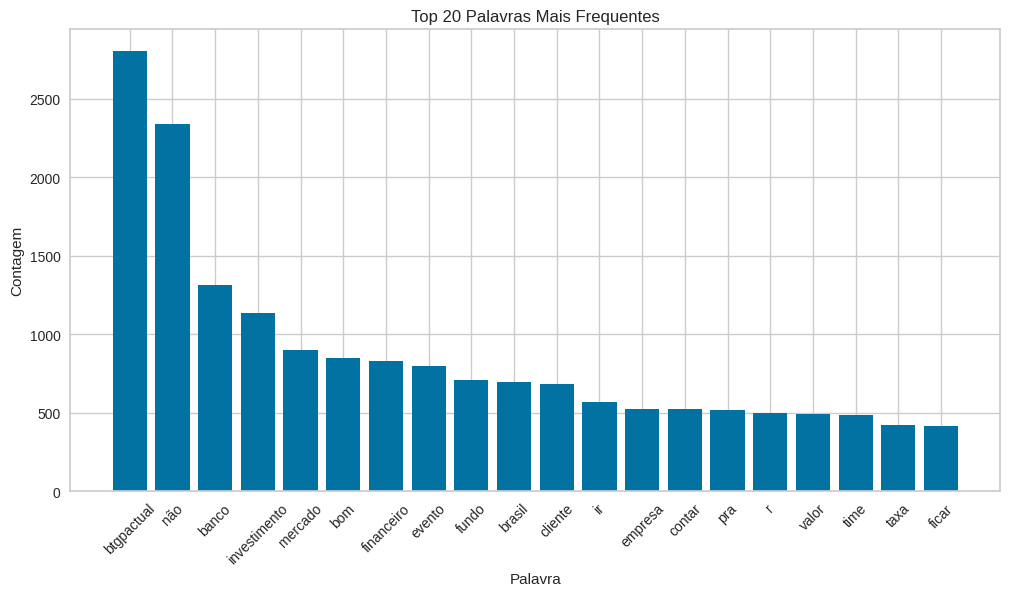

In [43]:
# Obter as palavras e suas frequ√™ncias do DataFrame de sa√≠da
palavras = output['Palavra'].tolist()
frequencias = output['Frequ√™ncia'].tolist()

# Plotagem do gr√°fico de barras, com as 20 palavras mais frequentes
plt.figure(figsize=(12, 6))
plt.bar(range(20), frequencias[:20])
plt.xticks(range(20), palavras[:20], rotation=45)  # Definir os r√≥tulos do eixo x como os nomes das palavras
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('Top 20 Palavras Mais Frequentes')
plt.show()

# 5. BoW + Naive Bayes

- Aqui irei aplicar um modelo demonstrativo utilizando o algoritmo de Naive Bayes, a partir da matriz apresentada pelo modelo Bag of Words

In [44]:
encoder = LabelEncoder() # Instanciando o encoder para transformar as classes em n√∫meros inteiros, a partir da biblioteca LabelEncoder

# ajustando o codificador aos dados da coluna 'sentimento' para ser poss√≠vel de se aplicar na predi√ß√£o
sentimento = encoder.fit_transform(df['sentimento'])

# Dividir os dados em treino e teste, a partir da biblioteca de train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(bow_model, sentimento, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes, a partir da biblioteca do NB
modelo = MultinomialNB()
modelo.fit(X_treino, y_treino)

# Fazer a predi√ß√£o usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicao_numerica)

# Avaliar a acur√°cia do modelo
acuracia = (predicao == df['sentimento'].iloc[y_teste]).mean()
print('Acur√°cia:', acuracia)

Acur√°cia: 0.4993781094527363


- Agora, irei aplicar o m√©todo de cross-validation 7 vezes para analisar os resultados

- O m√©todo de valida√ß√£o cruzada (cross-validation) √© uma t√©cnica usada para avaliar o desempenho de um modelo de aprendizado de m√°quina. Ele ajuda a estimar o desempenho do modelo em dados n√£o vistos, fornecendo uma medida mais robusta da sua capacidade de generaliza√ß√£o.

In [45]:
# Avaliar o modelo usando valida√ß√£o cruzada
scores = cross_val_score(modelo, bow_model, sentimento, cv=7)

# Exibir a acur√°cia m√©dia do modelo
print('Acur√°cia m√©dia:', scores.mean())

Acur√°cia m√©dia: 0.6263681362502335


- Agora irei aplicar a t√©cnica de GridSearch
- Grid search √© uma t√©cnica de busca de hiperpar√¢metros usada para encontrar a melhor combina√ß√£o de valores para um modelo de aprendizado de m√°quina. Ele consiste em definir um conjunto de valores para cada hiperpar√¢metro e treinar e avaliar o modelo com todas as combina√ß√µes poss√≠veis. O conjunto de hiperpar√¢metros que produz a melhor m√©trica de avalia√ß√£o √© selecionado como a configura√ß√£o final do modelo.


In [46]:
# Definir a grade de valores para os hiperpar√¢metros a serem testados
parametros = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}

# Criar uma inst√¢ncia do modelo MultinomialNB
modelo = MultinomialNB()

# Criar uma inst√¢ncia do objeto GridSearchCV
grid = GridSearchCV(modelo, parametros, cv=5, scoring='accuracy')

# Treinar o modelo com a busca exaustiva de hiperpar√¢metros
grid.fit(X_treino, y_treino)

# Exibir os resultados da busca exaustiva
print('Melhores hiperpar√¢metros:', grid.best_params_)
print('Melhor acur√°cia:', grid.best_score_)

# Criar um novo modelo com os melhores hiperpar√¢metros encontrados
modelo = MultinomialNB(alpha=grid.best_params_['alpha'], fit_prior=grid.best_params_['fit_prior'])
modelo.fit(X_treino, y_treino)

# Fazer a predi√ß√£o usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicao_numerica)

# Avaliar a acur√°cia do modelo no conjunto de teste
acuracia = accuracy_score(df['sentimento'].iloc[y_teste], predicao)
print('Acur√°cia no conjunto de teste:', acuracia)

Melhores hiperpar√¢metros: {'alpha': 1.0, 'fit_prior': True}
Melhor acur√°cia: 0.6517396721129225
Acur√°cia no conjunto de teste: 0.4993781094527363


-  Aqui n√≥s podemos ver a revoca√ß√£o do Gridsearch

In [47]:
# Definir a grade de valores para os hiperpar√¢metros a serem testados
parametros = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0], 'fit_prior': [True, False]}

# Criar uma inst√¢ncia do modelo MultinomialNB
modelo = MultinomialNB()

# Criar uma inst√¢ncia da m√©trica de avalia√ß√£o recall
recall = make_scorer(recall_score, average='macro')

# Criar uma inst√¢ncia do objeto GridSearchCV
grid = GridSearchCV(modelo, parametros, cv=5, scoring=recall)

# Treinar o modelo com a busca exaustiva de hiperpar√¢metros
grid.fit(X_treino, y_treino)

# Exibir os resultados da busca exaustiva
print('Melhores hiperpar√¢metros:', grid.best_params_)
print('Melhorrevoca√ß√£o:', grid.best_score_)

Melhores hiperpar√¢metros: {'alpha': 0.5, 'fit_prior': True}
Melhorrevoca√ß√£o: 0.6609166980005126


# Random Forest + BoW

In [48]:
# Criar uma inst√¢ncia do modelo Random Forest
rfc = RandomForestClassifier()

# Treinar o modelo com os dados de treino
rfc.fit(X_treino, y_treino)

# Fazer previs√µes com o modelo treinado
y_pred = rfc.predict(X_teste)

# Calcular a acur√°cia do modelo
acuracia = accuracy_score(y_teste, y_pred)

if len(np.unique(y_pred)) == 1:
    print("O modelo tem apenas uma classe de sa√≠da poss√≠vel.")
else:
    classification = classification_report(y_teste, y_pred)
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification)


Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59       360
           1       0.65      0.69      0.67       597
           2       0.69      0.76      0.72       651

    accuracy                           0.68      1608
   macro avg       0.69      0.65      0.66      1608
weighted avg       0.68      0.68      0.67      1608



- Aqui irei realizar a valida√ß√£o cruzada do modelo Random Forest e ver seu resultado

In [49]:
# Criar uma inst√¢ncia do modelo Random Forest
rfc = RandomForestClassifier()

# Realizar a valida√ß√£o cruzada de 5 folds
scores = cross_val_score(rfc, bow_model, sentimento, cv=5)

# Exibir as pontua√ß√µes de valida√ß√£o cruzada
print('Pontua√ß√µes de valida√ß√£o cruzada:', scores)

# Exibir a m√©dia das pontua√ß√µes de valida√ß√£o cruzada
print('M√©dia da valida√ß√£o cruzada:', scores.mean())

if len(np.unique(y_pred)) == 1:
    print("O modelo tem apenas uma classe de sa√≠da poss√≠vel.")
else:
    classification = classification_report(y_teste, y_pred)
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification)

Pontua√ß√µes de valida√ß√£o cruzada: [0.6050995  0.61007463 0.6511194  0.63246269 0.66169154]
M√©dia da valida√ß√£o cruzada: 0.632089552238806

Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.72      0.50      0.59       360
           1       0.65      0.69      0.67       597
           2       0.69      0.76      0.72       651

    accuracy                           0.68      1608
   macro avg       0.69      0.65      0.66      1608
weighted avg       0.68      0.68      0.67      1608



- Aqui irei realizar o grid search e ver seus melhores resultados

In [ ]:
# Definir a grade de valores para os hiperpar√¢metros a serem testados
parametros = {'n_estimators': [100, 200, 300], 
              'max_depth': [None, 10, 20], 
              'min_samples_split': [2, 5, 10]}

# Criar uma inst√¢ncia do modelo Random Forest
rfc = RandomForestClassifier()

# Criar uma inst√¢ncia do objeto GridSearchCV
grid = GridSearchCV(rfc, parametros, cv=5, n_jobs=-1)

# Realizar a busca em grade com valida√ß√£o cruzada
grid.fit(bow_model, sentimento)

# Exibir os resultados da busca em grade
print('Melhores hiperpar√¢metros:', grid.best_params_)
print('Melhor pontua√ß√£o:', grid.best_score_)

# Previs√µes do modelo
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Gerar o relat√≥rio de classifica√ß√£o
report = classification_report(y_test, y_pred_classes)
# Imprimir a tabela de classifica√ß√£o
print(report)

# Pycaret

O PyCaret executa uma compara√ß√£o automatizada de v√°rios algoritmos de aprendizado de m√°quina com v√°rias m√©tricas de valida√ß√£o para selecionar o melhor modelo para um determinado problema. Ele oferece a op√ß√£o de escolher o modelo com o melhor desempenho com base em m√©tricas como precis√£o, recall, F1-score, AUC-ROC, entre outras. Dessa forma, o PyCaret ajuda a simplificar e agilizar o processo de sele√ß√£o de modelos para cientistas de dados e analistas de neg√≥cios.


In [ ]:
# Criar o modelo de Bag-of-Words
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(df['texto_tratado'])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(bow_model, df['sentimento'], test_size=0.2, random_state=42)

# Criar e treinar o modelo de classifica√ß√£o de sentimentos
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Fazer a previs√£o usando os dados de teste
predictions = classifier.predict(X_test)

#Configurar o ambiente PyCaret e treinar o modelo usando valida√ß√£o cruzada
classif = setup(data = df, target = 'sentimento', verbose=False)
best_model = compare_models()

# Fazer a previs√£o usando os dados de teste
predictions = predict_model(best_model, data=X_test)

# Avaliar o desempenho do modelo
evaluate_model(best_model)